In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1019, 39)

In [5]:
train.columns

Index([u'Id', u'Model', u'Price', u'Age_08_04', u'Mfg_Month', u'Mfg_Year',
       u'KM', u'Fuel_Type', u'HP', u'Met_Color', u'Color', u'Automatic', u'CC',
       u'Doors', u'Cylinders', u'Gears', u'Quarterly_Tax', u'Weight',
       u'Mfr_Guarantee', u'BOVAG_Guarantee', u'Guarantee_Period', u'ABS',
       u'Airbag_1', u'Airbag_2', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player', u'Central_Lock', u'Powered_Windows',
       u'Power_Steering', u'Radio', u'Mistlamps', u'Sport_Model',
       u'Backseat_Divider', u'Metallic_Rim', u'Radio_cassette',
       u'Parking_Assistant', u'Tow_Bar'],
      dtype='object')

In [6]:
train.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0


In [9]:
train.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,...,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,724.867517,10738.358194,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,...,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,415.043138,3614.987568,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,...,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,8400.000000,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,9850.000000,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,31000.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train['Price'].describe()

count     1019.000000
mean     10738.358194
std       3614.987568
min       4350.000000
25%       8400.000000
50%       9850.000000
75%      11950.000000
max      31000.000000
Name: Price, dtype: float64

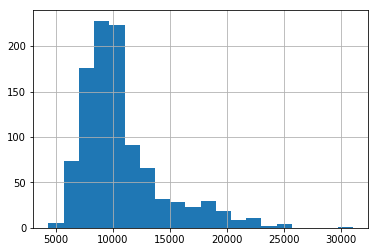

In [11]:
train['Price'].hist(bins=20)

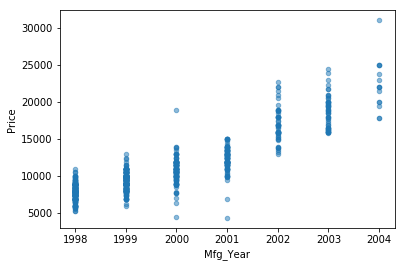

In [13]:
train.plot(kind='scatter', x='Mfg_Year', y='Price', alpha=0.5)

In [8]:
train['Mfg_Year'].value_counts()

1999    316
1998    280
2000    155
2001    134
2003     60
2002     59
2004     15
Name: Mfg_Year, dtype: int64

In [19]:
train_pre = train[train['Mfg_Year'] <= 2001]
train_post = train[train['Mfg_Year'] > 2001]

In [26]:
print train_pre.shape, train_post.shape

(885, 39) (134, 39)


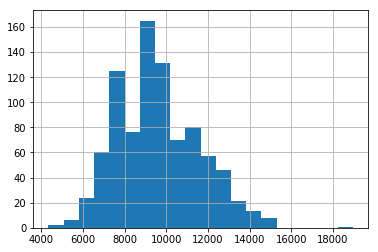

In [27]:
train_pre['Price'].hist(bins=20)

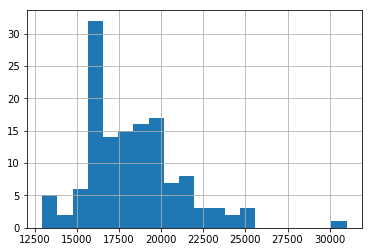

In [28]:
train_post['Price'].hist(bins=20)

In [25]:
train.columns

Index([u'Id', u'Model', u'Price', u'Age_08_04', u'Mfg_Month', u'Mfg_Year',
       u'KM', u'Fuel_Type', u'HP', u'Met_Color', u'Color', u'Automatic', u'CC',
       u'Doors', u'Cylinders', u'Gears', u'Quarterly_Tax', u'Weight',
       u'Mfr_Guarantee', u'BOVAG_Guarantee', u'Guarantee_Period', u'ABS',
       u'Airbag_1', u'Airbag_2', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player', u'Central_Lock', u'Powered_Windows',
       u'Power_Steering', u'Radio', u'Mistlamps', u'Sport_Model',
       u'Backseat_Divider', u'Metallic_Rim', u'Radio_cassette',
       u'Parking_Assistant', u'Tow_Bar'],
      dtype='object')

In [29]:
dfy_bf = train_pre.iloc[:,:3]
dfx_bf = train_pre.iloc[:,3:]

dfy_af = train_post.iloc[:,:3]
dfx_af = train_post.iloc[:,3:]

In [30]:
con_var = ['Age_08_04', 'KM', 'Weight']
des_var = ['CC', 'Doors', 'Cylinders', 'Gears', 'HP', 'Quarterly_Tax', 'Mfg_Month', 'Mfg_Year', 'Guarantee_Period']
cat_var = ['Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 
           'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 
           'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [34]:
dfx_bf[cat_var].describe()

,Met_Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.648588,0.053107,0.389831,0.888136,0.785311,0.964972,0.688136,0.440678,0.005650,0.194350,...,0.508475,0.970621,0.151412,0.240678,0.251977,0.763842,0.185311,0.151412,0.002260,0.308475
std,0.477681,0.224374,0.487987,0.315378,0.410839,0.183955,0.463517,0.496749,0.074994,0.395923,...,0.500211,0.168961,0.358653,0.427737,0.434394,0.424961,0.388769,0.358653,0.047511,0.462125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
dfx_af[cat_var].describe()

,Met_Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,134.000000,134.000000,134.000000,134.000000,134.0,134.0,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.0,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.805970,0.082090,0.492537,0.880597,1.0,1.0,0.910448,0.925373,0.417910,0.873134,...,0.955224,1.0,0.082090,0.395522,0.708955,0.820896,0.268657,0.082090,0.007463,0.082090
std,0.396936,0.275531,0.501820,0.325479,0.0,0.0,0.286611,0.263774,0.495066,0.334071,...,0.207588,0.0,0.275531,0.490797,0.455949,0.384879,0.444924,0.275531,0.086387,0.275531
min,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
